   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

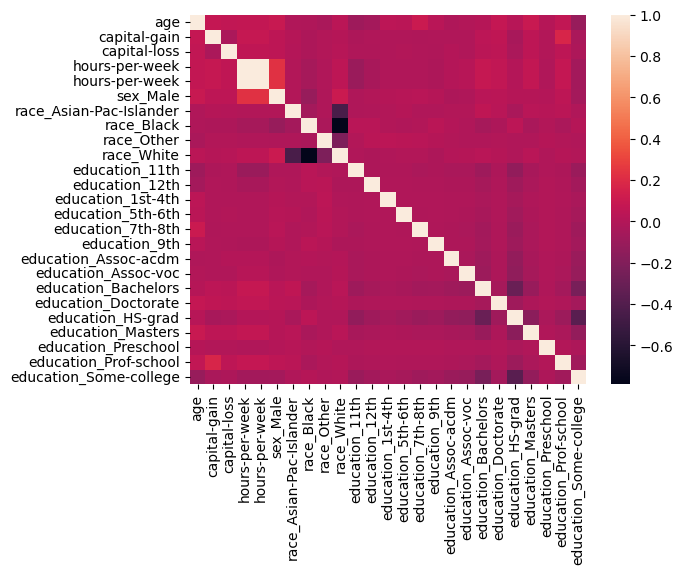

Model Parameters, Intercept:
[-5.60595842]
Model Parameters, Coeff:
[[ 3.67764083e-02  3.14853144e-04  6.66511775e-04  1.01904936e-02
   2.19676783e-02  1.03437506e+00  0.00000000e+00 -3.42582053e-01
   0.00000000e+00  9.22087041e-02 -5.74769329e-01  0.00000000e+00
   0.00000000e+00 -4.00558144e-01 -8.96842703e-01 -5.02027303e-01
   5.73479123e-01  5.48270357e-01  1.28392120e+00  1.79893040e+00
   0.00000000e+00  1.60031984e+00  0.00000000e+00  1.82375811e+00
   3.85950783e-01]]
Confusion Matrix on test set:
[[4775  251]
 [ 879  608]]
Accuracy Score on test set:
0.8265008444649163
0.8265008444649163
                  Variable  Coeficient
14       education_7th-8th   -0.896843
10          education_11th   -0.574769
15           education_9th   -0.502027
13       education_5th-6th   -0.400558
7               race_Black   -0.342582
1             capital-gain    0.000315
2             capital-loss    0.000667
3           hours-per-week    0.010190
4           hours-per-week    0.021968
0  

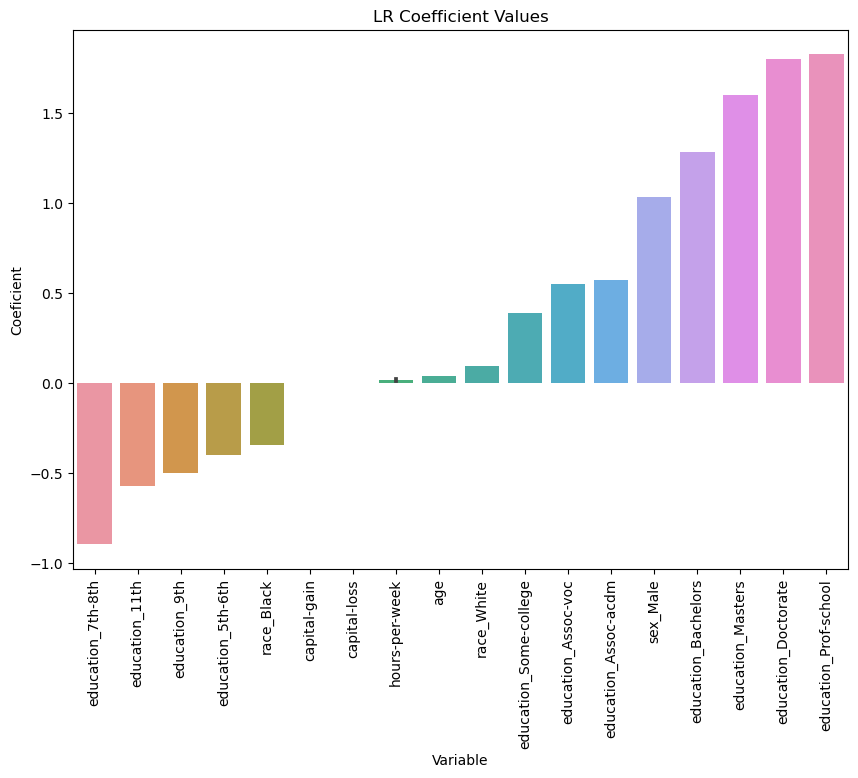

ROC AUC score: 0.8456810061787647


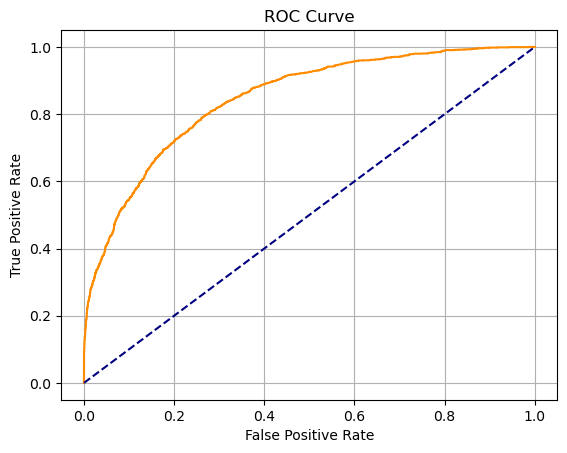

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns


col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult.data.csv',header = None, names = col_names)

#Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()
print(df.head())

#1. Check Class Imbalance
print(df.income.value_counts())

#2. Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'hours-per-week', 'education']
X = pd.get_dummies(df[feature_cols], drop_first=True)

#3. Create a heatmap of X data to see feature correlation
plt.figure()
sns.heatmap(X.corr())
plt.show()
plt.close()

#4. Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greater than 50k
y = np.where(df['income'] == "<=50K",0,1)

#5a. Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

#5b. Fit LR model with sklearn on train set, and predicting on the test set
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

#6. Print model parameters (intercept and coefficients)
print('Model Parameters, Intercept:')
print(log_reg.intercept_)
print('Model Parameters, Coeff:')
print(log_reg.coef_)

#7. Evaluate the predictions of the model on the test set. Print the confusion matrix and accuracy score.
print('Confusion Matrix on test set:')
print(confusion_matrix(y_test, y_pred))
print('Accuracy Score on test set:')
print(accuracy_score(y_test,y_pred))
print(log_reg.score(x_test,y_test))

# 8.Create new DataFrame of the model coefficients and variable names; sort values based on coefficient
coef_df = pd.DataFrame(zip(x_train.columns, log_reg.coef_[0]), columns=['Variable', 'Coeficient']).sort_values('Coeficient')
coef_df = coef_df[coef_df.Coeficient.abs()>0].sort_values('Coeficient')
print(coef_df)

#9. barplot of the coefficients sorted in ascending order
plt.figure(figsize = (10,7))
sns.barplot(data=coef_df, x='Variable', y='Coeficient')
plt.xticks(rotation=90);
plt.title('LR Coefficient Values')
plt.show()
plt.close()

#10. Plot the ROC curve and print the AUC value.
y_pred_prob = log_reg.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print(f'ROC AUC score: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], color='navy',linestyle='--')
plt.title('ROC Curve')
plt.grid()
plt.show()